# Implementation of projective transformations

## Naive algorithm

In this notebook we will implement algorithms for determining projective transformation for given original points (at least 4 points) and their images. 
<br/><br/>
Firstly, we will implement **naive algorithm**. It's based on composition of two transformations: inverted transformation from *basic points* (points with coordinates (1,0,0), (0,1,0), (0,0,1), (1,1,1)) to originals and transformation from basic points to images. They applied together are actually just this transformation.

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# inits
names = ['A', 'B', 'C', 'D']
coords = ['1. coordinate ', '2. coordinate ', '3. coordinate ']
points_originals = []
points_pictures  = []

In [318]:
# utility method for entering points
# arguments: 
#    - msg -- global message for whole input of points
#    - foreach_msg -- message for each point
#    - list of names of given points
def input_points(msg, foreach_msg, names = names):
    points = []
    print(msg)
    
    for point in names:
        print(foreach_msg, end = " ")
        print("{} ".format(point))
        first_c = float(input(coords[0]))
        second_c = float(input(coords[1]))
        third_c = float(input(coords[2]))
    
        points.append([first_c, second_c, third_c])
    return points

In [319]:
# we enter original points
points_originals = input_points("   Enter input points: ",
                                "* POINT")
points_originals

   Enter input points: 
* POINT A 
1. coordinate 1
2. coordinate 2
3. coordinate 3
* POINT B 
1. coordinate 3
2. coordinate 2
3. coordinate 1
* POINT C 
1. coordinate 0
2. coordinate 1
3. coordinate 1
* POINT D 
1. coordinate 7
2. coordinate 11
3. coordinate 10


[[1.0, 2.0, 3.0], [3.0, 2.0, 1.0], [0.0, 1.0, 1.0], [7.0, 11.0, 10.0]]

In [5]:
# we enter images of points
points_pictures = input_points("    Now enter appropriate images of these points",
                                "* IMAGE OF POINT")
points_pictures

    Now enter appropriate images of these points
* IMAGE OF POINT A 
1. coordinate -2
2. coordinate -1
3. coordinate 1
* IMAGE OF POINT B 
1. coordinate 2
2. coordinate -1
3. coordinate 1
* IMAGE OF POINT C 
1. coordinate 2
2. coordinate 1
3. coordinate 1
* IMAGE OF POINT D 
1. coordinate -2
2. coordinate 1
3. coordinate 1


[[-2.0, -1.0, 1.0], [2.0, -1.0, 1.0], [2.0, 1.0, 1.0], [-2.0, 1.0, 1.0]]

In [3]:
points_originals = [[-3.0, -1.0, 1.0], [3.0, -1.0, 1.0], [1.0, 1.0, 1.0], [-1.0, 1.0, 1.0]]
points_pictures  = [[-2.0, -1.0, 1.0], [2.0, -1.0, 1.0], [2.0, 1.0, 1.0], [-2.0, 1.0, 1.0]]

In [4]:
def draw_plot(points_originals, points_pictures):
    fig = plt.figure(figsize= (10,10))
    f1 = fig.add_subplot(221)
    points_originals_x = [e[0] for e in points_originals]
    points_originals_y = [e[1] for e in points_originals]
    f1.scatter(points_originals_x, points_originals_y, marker='o' , 
               linewidths= 4)

    f2 = fig.add_subplot(222)
    points_pictures_x = [e[0] for e in points_pictures]
    points_pictures_y = [e[1] for e in points_pictures]
    f2.scatter(points_pictures_x, points_pictures_y, marker='o' , 
               linewidths= 4, color = 'orange')
    plt.show

In [5]:
from copy import deepcopy

## Visualitation of points and their images

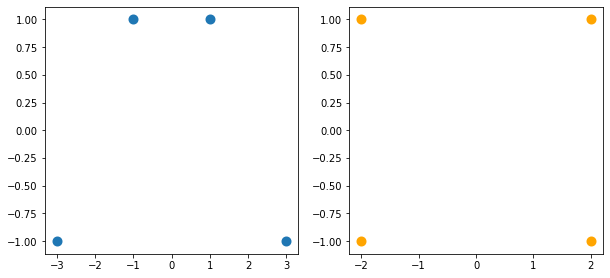

In [6]:
draw_plot(points_originals, points_pictures)

In [7]:
# repeated part of Cramer's rule
# utility method for create matrix delta_i, calcuating determinate, finding lambda - i
# arguments:
#    - matrix of system (coefficients with letters in system)
#    - constants (numbers from other side of equations)
#    - for witch letter we want to know value (witch lambda, expressed by order number)
def lambda_i(matrix_of_system, constants, i):
    delta_i = np.transpose(deepcopy(matrix_of_system))
    delta_i[i] = constants
    delta_i = np.transpose(np.array(delta_i))
    
    return np.linalg.det(delta_i) / np.linalg.det(np.array(matrix_of_system))

In [8]:
# method of whole Cramer's rule, we solve whole system - find values of all 3 lambdas
# matrix dimensions: (3x3), constants (1x3)
def cramers_rule_3(matrix_of_system, constants):
    lambda_1 = lambda_i(matrix_of_system, constants, 0)
    lambda_2 = lambda_i(matrix_of_system, constants, 1)
    lambda_3 = lambda_i(matrix_of_system, constants, 2)
    
    return (lambda_1, lambda_2, lambda_3)
    

In [9]:
# we find projection transformation witch
# maps from base points ((1,0,0), (0,1,0), (0,0,1), (1,1,1))
# to points given as argument (ALWAYS 4 points!)
def projection_transformation_from_base(points):
    matrix_of_system = np.array(points[:-1])
    matrix_of_system = np.transpose(matrix_of_system)
    lambdas = cramers_rule_3(matrix_of_system, points[-1])
    transformation = []
    
    for i in range(0,3):
        transformation.append([lambdas[i] * coordinate for coordinate in points[i]])
    
    return np.transpose(np.array(transformation))

In [10]:
# Finally, we calculate matrix of whole projective transformation
# from points_originals to points_pictures like composition
# of previous tranformation of points_originals (inverted!) and points_pictures
def projection_transformation(points_originals, points_pictures):
    g = projection_transformation_from_base(points_originals)
    f = projection_transformation_from_base(points_pictures)
    
    return np.dot(f, np.linalg.inv(g))

In [11]:
# Matrix of transformation
final_function = projection_transformation(points_originals, points_pictures)
final_function

array([[ 2.,  0.,  0.],
       [ 0.,  2., -1.],
       [ 0., -1.,  2.]])

## DLT - algorithm

**Naive algorithm** for calculating projective transformation for given 4 points and their images isn't bad in terms of time and memory (as its name maybe says), even it's great in this terms. But, it works just for 4 points and uniquely determines transformation. In general case somewhere we will have noise, so it's welcome we have much more given points for greater precision and algorithm which can do with more than 4 points.
<br/><br/>
Algorithm which can do with arbitrary number of points is **DLT - algorithm**. This is sort of algebraic algorithms based on SVD decomposition which minimizes error.

In [3]:
# utility method for finding rows for big matrix
# for each point and its image
# Arguments: point (original point) and point_picture (image of original point)
# NOTE: We return touple with appropriate rows
# (we calculate them by different formulas)
def M(point, point_picture):
    l1 = [0,0,0,
          -point_picture[2] * point[0], 
          -point_picture[2] * point[1],
          -point_picture[2] * point[2],
          point_picture[1] * point[0],
          point_picture[1] * point[1],
          point_picture[1] * point[2]]
    
    l2 = [point_picture[2] * point[0], 
          point_picture[2] * point[1],
          point_picture[2] * point[2],0,0,0,
         -point_picture[0] * point[0], 
          -point_picture[0] * point[1],
          -point_picture[0] * point[2]]
    return (l1,l2)

In [4]:
# utility method for making big matrix (we will decompose her )
# NOTE: We there suppose same number of original points and their images!
def A_matrix(points_originals, points_pictures):
    A = []
    n = len(points_originals)
    for i in range(0,n):
        hs = M(point=points_originals[i], point_picture=points_pictures[i])
        A.append(hs[0])
        A.append(hs[1])
    return A

In [5]:
# Finally, whole DLT algorithm

# **NOTE** : Scaling is temporary disabled!
# *****************************************
# -----NOTE: We use final output from naive algorithm like valid output
# (bad practice in general case)
# for scaling on approximately values like them
# (this 'damn lambda' in projective transformations)
def DLT(points_originals, points_pictures):
    A = A_matrix(points_originals, points_pictures) # big matrix
    decomposition = np.linalg.svd(np.array(A))  # SVD decomposition of big matrix
    
    # parsing transformation from v matrix
    transformation_ = np.array(decomposition[2][-1]).reshape(3,3)
    
    #transformation_ = transformation_ * ((final_function[0][0] / transformation_[0][0])) # scaling
    return transformation_

In [15]:
DLT(points_originals, points_pictures)

array([[ 5.34522484e-01,  6.18413875e-17, -2.58635702e-16],
       [-5.55111512e-17,  5.34522484e-01, -2.67261242e-01],
       [-5.55111512e-17, -2.67261242e-01,  5.34522484e-01]])

Now we found out why is this algorithm better for general usage. With more correspodences we have greater precision, and of course, better results. But still there are some issues.
<br/><br/>
Not good fact about this algorithm is non-invariance of changes of coordinates (beacuse this is just an algebraic and no geometry algorithm). Solution is doing *normalisation* of coordinates and then transformation won't depend of choice of coordinates. *Normalisation* is composed of determining center of points, its translating to $origin$ and scaling to average distance of origin $\sqrt{2}$ .

## Application to picture processing

NOTE: Need to fix

In [6]:
from PIL import Image

In [7]:
points_originals = [[354.0,188.0,1.0], [365.0, 314.0, 1.0], [469.0, 254.0, 1.0], [452.0, 113.0, 1.0]]
points_pictures  = [[369.0,179.0,1.0], [387.0, 337.0,1.0], [533.0, 334.0, 1.0], [521.0, 151.0,1.0]]

In [16]:
def from_pixels(point, img_size):
    p = [float(point[0]), float(img_size[1] - point[1]), 1.0]
    #p = p.reshape(3,1)
    #print(p)
    return p

In [14]:
def process_picture(name):
    img_original = Image.open(name)
    img_size = img_original.size
    img_picture = Image.new('RGB', img_size, 'white')
    transform = np.linalg.inv(
        DLT(points_originals = points_originals, points_pictures=points_pictures))
    transform /= transform[0,0]
    transform = transform.transpose()
    for i in range(0, img_original.size[0]):
        for j in range(0, img_original.size[1]):
            #from_pixels(point = [i,j], img_size = img_size)
            #tp = np.dot(transform, from_pixels(point = [i,j], img_size = img_size))
            tp = np.dot([i,j,1], transform)
            #tp = tp.reshape(1,3)[0]
            #tp = list(tp[0])
            
            if tp[2] == 0:
                continue
            tp = [(e / tp[2]) for e in tp]
            if math.ceil(tp[0]) < 0 or math.ceil(tp[1]) < 0 or \
            math.ceil(tp[0]) > img_size[0] - 1 or math.ceil(tp[1]) > img_size[1] - 1:
                    continue
            #tp/= tp[2]
            #print(tp)
            #print(tp)
            #tp = list(tp.reshape(1,3)[0])
            #tp = [int(math.ceil(e)) for e in tp]
            #print(tp)
            #if tp[0] < 0 or img_original.size[1] - tp[1] > 0 or tp[0] >= img_original.size[0] or img_original.size[1] - tp[1] >= img_original.size[1]:
            #        continue
            #img_size = img_original.size
            #img_picture.putpixel((tp[0], img_size[1] - tp[1]), img_original.getpixel((i, j)))
            #img_picture.save()
            
            col = img_original.getpixel((math.ceil(tp[0]), math.ceil(tp[1])))
            img_picture.putpixel((i,j), col)
    return img_picture

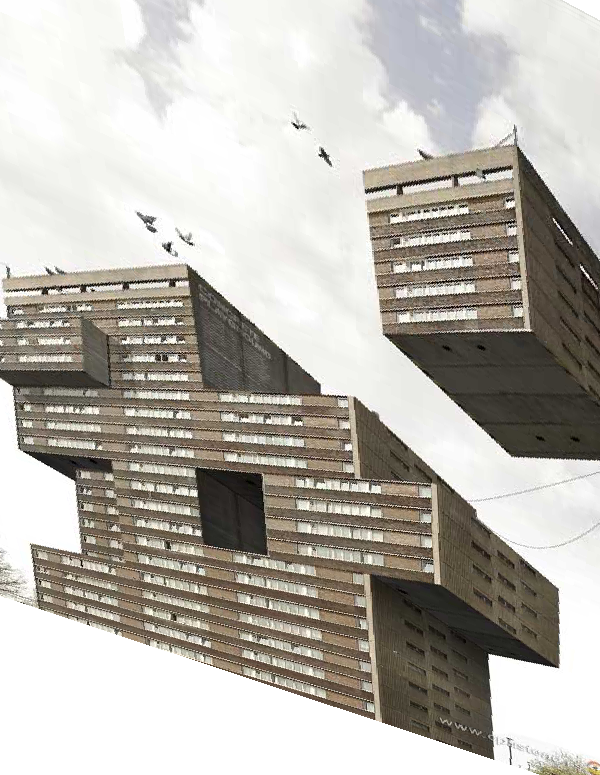

In [15]:
process_picture('building.png')

In [124]:
# drugi pokusaj
def transform_picture(path):
    transformation = DLT(points_originals = points_originals,
                         points_pictures  = points_pictures)
    
    img = Image.open(path)
    img_pixels = Image.
    
    img_picture_pixels = img_pixels
    img_picture_pixels.reshape()
    img_picture_pixels.fill(255)
    
    for i in range(0, img_dimensions[1]):
        for j in range(0, img_dimensions[0]):
            t = np.array([i, img_dimensions[0] - j, 1])
            t.reshape(1,3)
            transformated_pixel = np.dot(transformation,t)
            #print(transformated_pixel)
            transformated_pixel /= transformated_pixel[2]
            #print(transformated_pixel)
            X = int(transformated_pixel[0])
            Y = int(transformated_pixel[1])
            
            if X < 0 or Y  < 0 or X > img_dimensions[0] or Y > img_dimensions[1]:
                continue
            
            img_picture_pixels[X - 1,img_dimensions[1] - 1 - Y,0] = img_pixels[i,j,0]
            img_picture_pixels[X - 1,img_dimensions[1] - 1 - Y,1] = img_pixels[i,j,1]
            img_picture_pixels[X - 1,img_dimensions[1] - 1 - Y,2] = img_pixels[i,j,2]
    
    img.close()
    return img_picture_pixels

## Modificated DLT - algorithm (*with normalisation*)

**Center of points** (in affine coordinates):

Formula for determining center of points (equal masses):

$$\sum\limits_{i = 1}^{n}{\vec{TAi}} = \vec{0}$$

Further we get

$$ \sum\limits_{i=1}^{n} \pmatrix{x_{ai} \\ y_{ai}} - \pmatrix{x_t \\ y_t } = \pmatrix{0 \\ 0}$$

$$ \sum\limits_{i=1}^{n} \pmatrix{x_{ai} - x_t \\ y_{ai} - y_t } = \pmatrix {0 \\ 0 } $$

$$ \sum\limits_{i=1}^{n} x_{ai} - x_t = 0 ,  \sum\limits_{i=1}^{n} y_{ai} - y_t = 0  $$
 
$$ \sum\limits_{i=1}^{n} x_{ai} = n * x_t ,  \sum\limits_{i=1}^{n} y_{ai} = n * y_t $$

So, we at the end get 

$$ \frac{\sum\limits_{i=1}^{n} x_{ai}}{n} = x_t , \frac{\sum\limits_{i=1}^{n} y_{ai}}{n} = y_t $$

$$ \boxed{x_t = \overline{x_{ai}}},\boxed{y_t = \overline{y_{ai}}} $$

We will applicate just this formula.

In [16]:
# utility method for determining center of points
# points given like two-component touples with affine coordinates
def center_of_points(points):
    xs = [point[0] for point in points]
    ys = [point[1] for point in points]
    
    return (np.average(xs), np.average(ys))

**Scaling to average distance of $origin$ $\sqrt{2}$**

Let's $\sigma$ average distance of $origin$.

$$ \sigma = \frac{\sum\limits_{i=1}^{n}{\sqrt{x_i^2 + y_i^2}}}{n} $$
$$ \frac{\sqrt{2}}{\sigma} * / \sigma = \frac{\sum\limits_{i=1}^{n}{\sqrt{x_i^2 + y_i^2}}}{n} $$
$$ \sqrt{2} = \frac{(\frac{\sqrt{2}}{\sigma})*\sum\limits_{i=1}^{n}{\sqrt{x_i^2 + y_i^2}}}{n} $$
$$ \sqrt{2} = \frac{\sum\limits_{i=1}^{n}{\sqrt{(\frac{\sqrt{2}}{\sigma})^2*(x_i^2 + y_i^2)}}}{n} $$
$$ \sqrt{2} = \frac{\sum\limits_{i=1}^{n}{\sqrt{(((\frac{\sqrt{2}}{\sigma})*x_i)^2 + ((\frac{\sqrt{2}}{\sigma})*y_i)^2)}}}{n} $$

So we can do scalling with parameter $(\frac{\sqrt{2}}{\sigma})$ to both coordinates. (homotety with coefficient $k=(\frac{\sqrt{2}}{\sigma})$ )

In [17]:
# utility method for calculating scaling matrix (like projective transformation)
# points given like two-component touples with affine coordinates
# it could be shorter using numpy's properties and some optimizations
# but now isn't focus on this
def scaling_to_sqrt_2(points): 
    sigma = 0
    for (x,y) in points:
        sigma += math.sqrt(x**2 + y**2)
    sigma /= (len(points))
    k = math.sqrt(2) / sigma
    return np.array([[k,0,0], [0,k,0],[0,0,1]]).reshape(3,3)

In [18]:
# utility method for conversion from homogeneous to affine coordinates
# points given like three-component touples with homogeneous coordinates
# NOTE: We suppose NO INFINITY FAR points in list
def get_affine(points):
    return [(x[0]/x[2], x[1]/x[2]) for x in points]

In [19]:
# utility method for conversion to homogeneous from affine coordinates
# points given like two-component touples with affine coordinates
def to_homogenous(points):
    return [(x[0], x[1], 1) for x in points]

In [20]:
# method for whole calculating matrix of normalisation
# points given like three-component touples with homogeneous coordinates
def normalization(points):
    a_points = get_affine(points)
    t = center_of_points(a_points)
    
    # matrix of translation
    T = np.array([[1,0,-t[0]],
                  [0,1,-t[1]],
                  [0,0,1]  ])
    S = scaling_to_sqrt_2(a_points)
    return np.dot(S, T)

In [21]:
# utility method for application got normalization transformation on points
# points are given in homogenous coordinates
def normalize_points(points):
    points_arg = []
    N = normalization(points)
    
    for point in points:
        p = np.dot(N,np.array(point).reshape(3,1)).reshape(1,3)[0]
        points_arg.append(p)
    
    return points_arg

In [22]:
# Whole DLT algorithm with normalization
def modified_DLT(points_originals, points_pictures):
    N_o = normalization(points_originals)
    N_p = normalization(points_pictures)
    points_o_norm = normalize_points(points_originals)
    points_p_norm = normalize_points(points_pictures)
    
    P = DLT(points_originals = points_o_norm,
            points_pictures  = points_p_norm)
    
    N_p_inv = np.linalg.inv(N_p)
    
    return np.dot(np.dot(N_p_inv,P), N_o)

In [23]:
# Totally random values for demonstration
modified_DLT([(1,2,3),(-4,5,6)], [(1,1,1), (4,5,6)])

array([[ 0.17244779, -0.53985373,  1.17768421],
       [ 0.10144537, -0.04660686,  0.87252043],
       [-0.04280793,  0.00713466,  0.88477719]])

In [24]:
# Test values
modified_DLT(points_originals, points_pictures)

array([[ 5.09717651e-01,  4.60060610e-17,  1.03645504e-16],
       [-5.42453603e-17,  5.09717651e-01, -2.54858825e-01],
       [ 1.71538891e-17, -2.54858825e-01,  5.09717651e-01]])

In [34]:
from tkinter import *
from PIL import Image, ImageTk

In [315]:
root = Tk()  # create a window

frame = Frame(root)  # define upper frame
middleframe = Frame(root)  # define middle frame
exitFrame = Frame(root)  # define exit frame
frame.pack()  # pack the frame
middleframe.pack()  # pack the subframe
exitFrame.pack(side = 'bottom')  # pack the exit frame

# function that closes the GUI
def close_window(): 
    root.destroy()

# load the image
img = PhotoImage(file="building.png")  # save the image
panel = Label(frame, image=img)  # display the image as a label
panel.grid(row=0, column=0)  # pack the image

# make the user select some points
global x_Coordinates  # initialize empty list for storing x-axis coordinates
global y_Coordinates  # initialize empty list for storing y-axis coordinates
x_Coordinates = []
y_Coordinates = []

clicks = 0
def countClicks():
    global clicks # this will use the variable to count
    clicks = clicks + 1  # increment "clicks"
    if clicks == 2: # if the user has selected 2 points, add a button that closes the window
        exit_button = Button(exitFrame, state = "normal", text = "Done!", command = close_window)  # link the closing function to the button
        exit_button.grid(row=2, column=0, pady=5)  # set button position with "grid"        
pass

def selectPoints():  # function called when user clicks the button "select two points"
    panel.bind("<Button 1>", saveCoordinates)  #  link the function to the left-mouse-click event
    exit_button = Button (exitFrame, state = "disabled", text = "Done!", command = close_window)  # link closing function to the button
    exit_button.grid(row=2, column=0, pady=5)  # set button position with "grid"
    button_select_points.config(state = "disabled") # switch button state to "disabled"

def saveCoordinates(event): # function called when left-mouse-button is clicked   
    x_coordinate = event.x  # save x and y coordinates selected by the user
    y_coordinate = event.y
   #print("X: ", x_coordinate)
   #print("Y: ", y_coordinate)
   #print()
   #print("----------")
   #print()
    x_Coordinates.append(x_coordinate)  # append to external list
    y_Coordinates.append(y_coordinate)  # append to external list
    countClicks()  # invoke function "countClicks"

button_select_points = Button(middleframe, text = "select two points", command = selectPoints)  # insert button and link it to "selectPoints"
button_select_points.grid(row=1, column=0, pady=5)  # set button position with "grid"

root.mainloop()  # keep the GUI open

In [ ]:
import sys
from PyQt5.QtWidgets import QApplication, QWidget, QLabel
from PyQt5.QtGui import QIcon, QPixmap

class App(QWidget):

    def __init__(self):
        super().__init__()
        self.title = 'PyQt5 image - pythonspot.com'
        self.left = 10
        self.top = 10
        self.width = 640
        self.height = 480
        self.initUI()
    
    def initUI(self):
        self.setWindowTitle(self.title)
        self.setGeometry(self.left, self.top, self.width, self.height)
    
        # Create widget
        label = QLabel(self)
        pixmap = QPixmap('image.jpeg')
        label.setPixmap(pixmap)
        self.resize(pixmap.width(),pixmap.height())
        
        self.show()


app = QApplication(['My application'])
ex = App()
sys.exit(app.exec_())
